In [17]:
import numpy as np
from function_headers_fdtd import fdtd_1d, Fdtd1DAnimation
from matplotlib import pyplot as plt



plt.rcParams.update({
        'figure.figsize': (12/2.54, 9/2.54),
        'figure.subplot.bottom': 0.15,
        'figure.subplot.left': 0.165,
        'figure.subplot.right': 0.90,
        'figure.subplot.top': 0.9,
        'axes.grid': False,
        'image.cmap': 'bluered_dark',
})

plt.close('all')


# Task 1

## 1.1 
Simulate the propagation of an ultrashort pulse in a dispersion-free dielectric medium $\epsilon$(x)=1.

In [18]:
# constants
c = 2.99792458e8 # speed of light [m/s]
mu0 = 4*np.pi*1e-7 # vacuum permeability [Vs/(Am)]
eps0 = 1/(mu0*c**2) # vacuum permittivity [As/(Vm)]
Z0 = np.sqrt(mu0/eps0) # vacuum impedance [Ohm]

# geometry parameters
x_span = 18e-6 # width of computatinal domain [m]
n1 = 1 # refractive index in front of interface
n2 = 2 # refractive index behind interface
x_interface = x_span/4 #postion of dielectric interface

# simulation parameters
dx = 15e-9 # grid spacing [m]
time_span = 60e-15 # duration of simulation [s]

Nx = int(round(x_span/dx)) + 1 # number of grid points

# source parameters
source_frequency = 500e12 # [Hz]
source_position = 0 # [m]
source_pulse_length = 1e-15 # [s]

# %% create permittivity distribution and run simulation %%%%%%%%%%%%%%%%%%%%%%

eps_rel=np.ones((Nx,))
Ez, Hy, x, t=fdtd_1d(eps_rel, dx, time_span, source_frequency, source_position, source_pulse_length)
print(Ez.shape)
print(Hy.shape)
print(x.shape)
print(t.shape)

(2399, 1201)
(2399, 1200)
(1201,)
(2399,)


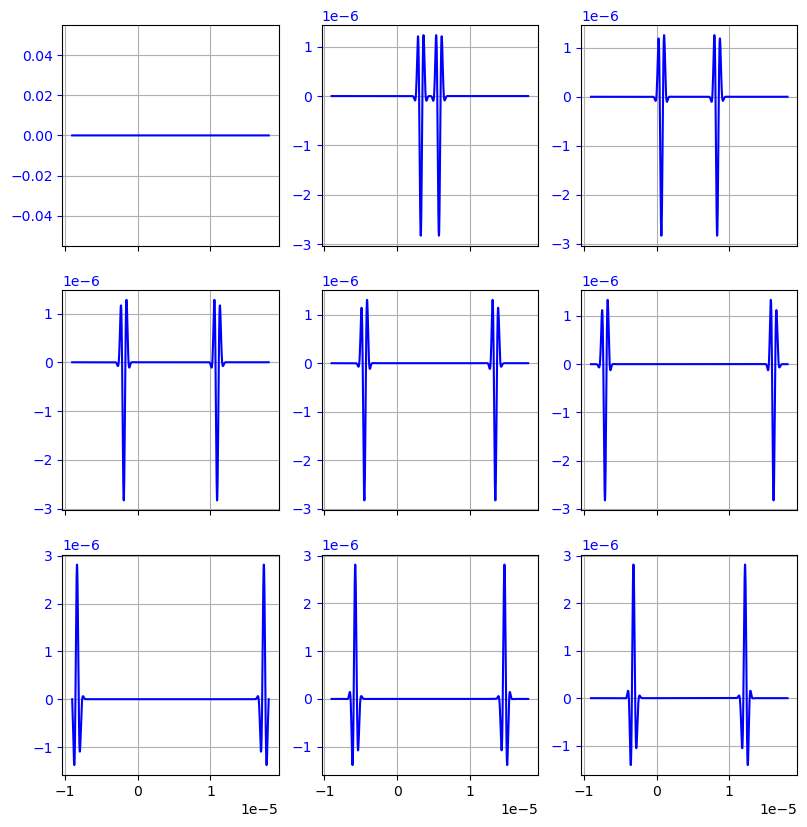

In [19]:
# %% create representative figures of the results %%%%%%%%%%%%%%%%%%%%%%%%%%%%%

fig, ax = plt.subplots(3,3,sharex= True, figsize=(10,10))
ax = ax.flat

for i in range(9):
    ax[i].plot(x, Ez[230*i, :] ,'b-', label='E in [a.u.]')
    ax[i].grid()
    ax[i].tick_params('y', colors='b') # style of line

## Discussion

Apparently, after colliding on the wall, field can bounce back and continue propagating because perfect conducting boundary condition is used in this task. We set the value of boundaries directly as zeros. Two boundaries act as the behavior of metal; therefore, reflection can be observed in this simulation. 

## 1.2
See what happens when the pulse hits the interface between two different dielectric media
with permittivities $\epsilon$ 1 = 1 and $\epsilon$ 2 = 4, the interface should be located at a distance of
4.5 µm in positive direction from the center of the computational domain.

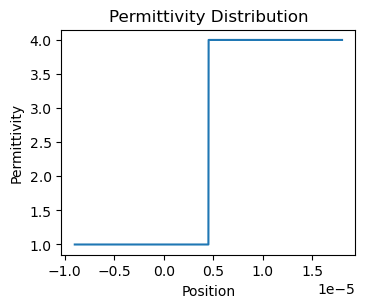

In [20]:
eps_rel=np.ones((Nx,))
indices = x >= x_span/4
eps_rel[indices] = 4
plt.figure(figsize=(4,3))
plt.plot(x, eps_rel)
plt.xlabel('Position')
plt.ylabel('Permittivity')
plt.title('Permittivity Distribution')
plt.show()

In [21]:
Ez, Hy, x, t=fdtd_1d(eps_rel, dx, time_span, source_frequency, source_position, source_pulse_length)

### Figure Description
The propagation behavior is shown below, blue line represents the amplitude of poynting vecotor, red line represents permittivity distribution. 

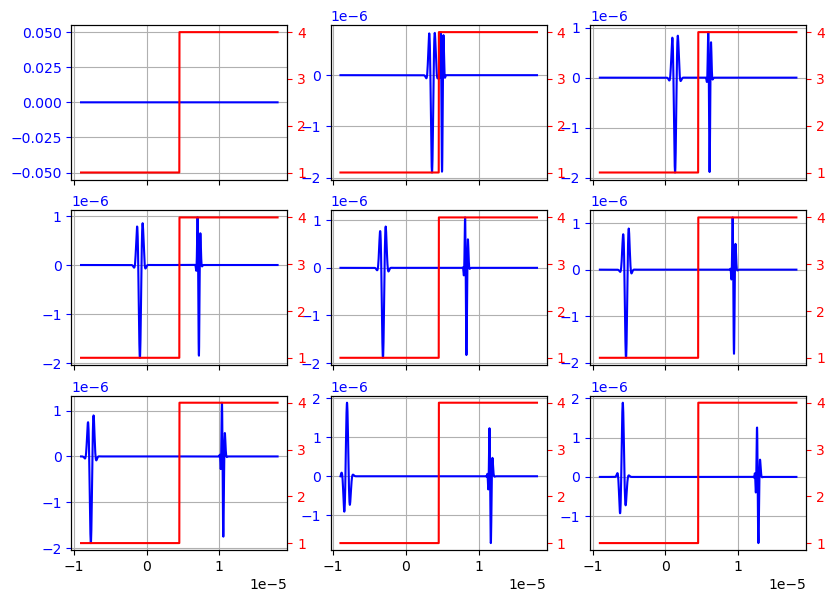

In [22]:
# %% create representative figures of the results %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig, ax = plt.subplots(3,3,sharex= True, figsize=(10,7))
ax = ax.flat

for i in range(9):
    ax[i].plot(x, Ez[200*i, :] ,'b-', label='E in [a.u.]')
    ax[i].grid()
    ax[i].tick_params('y', colors='b') # style of line
    
    ax2 = ax[i].twinx()
    ax2.plot(x, eps_rel, 'r-',label='permittivity')
    ax2.tick_params('y', colors='r')

## Discussion

In this case, after the field across through the interface of different material, both transmission and reflection can be observed. Based on the formula $ \frac{(n1-n2)^2}{(n1+n2)^2} $ , the reflectance can be derived as 11%.  This can be also confirmed in the simulation that most part of field can transmit through the interface.  Similarly as previous task, after fields collide on the metal boundary, they can be totally reflected and keep propagating. 

# 2. 3D FDTD case

In [23]:
def field_source(x, y, t, j0, f, t0, tau, w):
    time_term = np.exp(-2 * np.pi * 1j * f * t)
    temporal_envelope = np.exp(-(t - t0)**2 / (2 * tau**2))
    spatial_distribution = np.exp(-(x**2 + y**2) / (w**2))
    
    field = j0 * time_term * temporal_envelope * spatial_distribution
    return field

## Discussion

# 3. Convergence test